# Project: Investigating Average Rating and Profit

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I am using the TMDB movie data for this analysis. The data contains information such as budget, revenue, genres, and more. It is important to note that the genres are as defined on the moviedb website. It would be interesting to create a new column, profit, and find out which genres contribute the most to profit. I also want to know which genres paired with that found genre tends to have a higher average rating. And with that, I want to know if the higher rated pairs have any correlation with popularity or profit. Finally, I want to find out how year release and movie length have an impact on average rating within the higher rated pairs.

Research questions:

1. Which genre contributes the most profit?

2. Which genres drive that genre upward in average rating?

3. Are higher rated pairs correlated with higher popularity or higher profit?

4. Are the classics rated higher on compared to more modern movies?

5. Are longer movies rated higher on average than shorter movies?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *

C:\Users\Skywind\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<a id='wrangling'></a>
## Data Wrangling and Cleaning


In [2]:
df = pd.read_csv('C:/Users/Skywind/Desktop/Python/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Check for duplicated data
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [4]:
#Examine duplicated data
df[df['original_title'] == 'TEKKEN']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Here we see that indeed there are two duplicate entries. Since this particular dataset already pools in votes from all sources, there shouldn't be any duplicate entries in the dataset. We will remove one of these instances because it is repeating information and could change our analysis slightly if we keep it in.

In [5]:
#Remove duplicated data
df = df.drop_duplicates()

In [6]:
#Check for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

There are a lot of useless columns here. There are null values, but I may not be using the columns with null values. I will take the columns that may be useful for my research questions. I will also create the profit column and use millions of dollars as the unit since it's easier to read. I am assuming that the profit is the budget subtracted from the revenue.

In [7]:
#Subset data
df2 = df[['popularity', 'budget', 'revenue', 'genres', 'runtime', 'vote_count', 'vote_average', 'release_year']]

#Create profit column
df2 = df2.assign(profit = (df2['revenue'] - df2['budget'])/1000000)

df2.head()

,popularity,budget,revenue,genres,runtime,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,124,5562,6.5,2015,1363.528810
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,120,6185,7.1,2015,228.436354
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,119,2480,6.3,2015,185.238201
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,136,5292,7.5,2015,1868.178225
4,9.335014,190000000,1506249360,Action|Crime|Thriller,137,2947,7.3,2015,1316.249360


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
genres          10842 non-null object
runtime         10865 non-null int64
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
profit          10865 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 848.8+ KB


From this we see that the data types of the variables are in the correct form except for release_year as an integer instead of a date. But, I plan to recode this column so as an integer is more convenient. There appears to be null values in genres. I will check to see where they are null.

In [9]:
df2[df2['genres'].isnull()]

,popularity,budget,revenue,genres,runtime,vote_count,vote_average,release_year,profit
424,0.244648,0,0,NaN,100,21,6.1,2015,0.000
620,0.129696,0,0,NaN,90,13,5.0,2015,0.000
997,0.330431,0,0,NaN,44,13,6.8,2014,0.000
1712,0.302095,0,0,NaN,88,57,7.4,2009,0.000
1897,0.020701,0,0,NaN,76,11,7.0,2009,0.000
2370,0.081892,0,0,NaN,0,12,5.8,2010,0.000
2376,0.068411,0,0,NaN,62,11,7.7,2010,0.000
2853,0.130018,0,0,NaN,110,12,7.2,2001,0.000
3279,0.145331,0,0,NaN,96,11,6.1,2008,0.000
4547,0.520520,0,0,NaN,220,12,8.3,2012,0.000


From this we definitely see that the genre rows listed here are null. We also see a lot of 0's in the budget and revenue columns. Let's also inspect the min/maxes of the numerical columns.

In [10]:
df2.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,25.202610
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,96.591030
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,-413.912431
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,9.092453
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2544.505847


From here, we see that the minimum value for budget, revenue, and runtime are 0. Since these values are impossible, it is likely that these 0's represent null values as well. Let's check how many there are for each column.

In [11]:
len(df2[(df2['budget'] == 0) | (df2['revenue'] == 0) | (df2['runtime'] == 0)])

7011

This means there are 7011 rows where either budget, revenue, or both have a null value. This includes the previous found null values for genres since we saw 0's the revenue or budget or both columns from earlier. For the first and third question, we can't have any 0's in the budget or revenue column. But we don't care about 0's in these columns when we want to examine average rating with year released and runtime. For the run time question we want to make sure there are no 0's in that particular column. We will need to create a few different data frames to serve our purposes.

While it is possible to manually locate the genres for the few number of null values we have, but for conveniency we will not. For now, it's better to not drop the null values because research question four and five don't make use of the genre column. Next, we will make a new column that decides if a movie is a classic or not. With a google search, it is the consensus that after 25 years a movie is considered a classic. Since it is early 2018, 25 years would make it 1993, but depending on when it was released it may not be 25 years. So, we will say that a movie is a classic if it was made on 1992 or before.

In [12]:
df3 = df2.copy()
df3['classic'] = np.where(df3['release_year'] > 1992, 'no', 'yes')

We will save the dataframe for use later in the fourth research question. We also only need the vote_count, vote_average, and classic column to answer our question

In [13]:
df_4 = df3.copy()
df_4 = df_4[['vote_count', 'vote_average', 'classic']]

For the fifth question, we will need to address only the 0's in the runtime column. So, we will remove the 0's first.

In [14]:
df3 = df3[df3['runtime'] != 0]

Next, we will make a new column to determine if a movie is considered long or not. With just an arbitrary number, we will use the number 110 as the breaking point. Any movie past 110 minutes will be considered long.

In [15]:
df4 = df3.copy()
df4['movie_long'] = np.where(df4['runtime'] > 110, 'yes', 'no')

We will save the dataframe for use later in the fifth research question. We also only need the vote_count, vote_average, and movie_long to answer our question

In [16]:
df_5 = df4.copy()
df_5 = df_5[['vote_count', 'vote_average', 'movie_long']]

For our second question, we only care about the genres and ratings. For the first and third question, we care about the 0's in the budget, revenue, and null values in the genre column. So, first we will remove the null values.

In [17]:
df2 = df2.dropna()

Save the dataframe for use in the second research question and subset

In [18]:
df_2 = df2.copy()
df_2 = df_2[['genres', 'vote_count', 'vote_average']]

Next, we will remove the 0's in the budget and revenue columns. We also subset the data.

In [19]:
df_clean = df2[(df2['budget'] != 0) & (df2['revenue'] != 0)]

df_clean = df_clean[['popularity', 'genres', 'vote_count', 'vote_average', 'profit']]

It is important to note that to answer the third question, we need to go through the second question which means the findings may be limited because we exclude 7011 rows of data. Which is why we will compare the dataframe that includes the 7011 rows of data for the second question

<a id='eda'></a>
## Exploratory Data Analysis

### Which genre contributes the most profit?

First, I will make the genre column all lower case in case there are typos for upper/lower cases. Afterward, I can select genres without worrying about case sensitivity. 

In [20]:
#Make genre column lowercase
df_clean2 = df_clean.copy()
df_clean2['genres'] = df_clean2['genres'].apply(lambda x: x.lower() )

Next, I will subset the data so that it only includes movies that include the genre action so that we can examine movies tagged only with action to find the profits for action.

In [21]:
is_action = df_clean2[df_clean2['genres'].str.contains('action')]

Next, I will sum up the profit column so that it represents how much profit was made under that genre tag

In [22]:
sum(is_action['profit'])

108648.33465400014

This value means that the profit for the action genre overall is 108648.33465400014*1000000 dollars. I will create a list of tags that includes all the genres and pair it with the resulting profits. I don't include the TV movie genre since it's not really a typically used genre.

In [23]:
genre_tags = ['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
              'horror', 'music', 'mystery', 'romance', 'science fiction', 'thriller', 'war', 'western']

I will define the following with just action and gradually append values

In [24]:
genre_profit = [108648.33465400014]

I'll create a function to reduce tedious work

In [25]:
def total_profit(genre):
    """Find total_profit for specified genre and append to genre_profit"""
    
    is_genre = df_clean2[df_clean2['genres'].str.contains(genre)]
    total_profit = sum(is_genre['profit'])
    genre_profit.append(total_profit)

Apply function to find remaining profits for the genres

In [26]:
total_profit('adventure')
total_profit('animation')
total_profit('comedy')
total_profit('crime')
total_profit('documentary')
total_profit('drama')
total_profit('family')
total_profit('fantasy')
total_profit('history')
total_profit('horror')
total_profit('music')
total_profit('mystery')
total_profit('romance')
total_profit('science fiction')
total_profit('thriller')
total_profit('war')
total_profit('western')

I will create a new dataframe with the paired data so that we can easily see which profit value corresponds to which genre.

In [27]:
list_labels = ['genre', 'profit']
list_cols = [genre_tags, genre_profit]
zipped = list(zip(list_labels, list_cols))
data = dict(zipped)
result = pd.DataFrame(data)

Sort by descending to see what has the highest profit more easily.

In [28]:
print(result.sort_values('profit', ascending = False))

              genre         profit
1         adventure  111116.350289
0            action  108648.334654
3            comedy   87220.956730
6             drama   81258.694274
15         thriller   72776.818635
7            family   59786.616231
8           fantasy   58416.626181
14  science fiction   56024.135646
13          romance   39001.273098
2         animation   36217.190531
4             crime   33270.885699
12          mystery   19257.823544
10           horror   17928.052307
11            music    7736.431872
16              war    7589.371329
9           history    5250.302652
17          western    1798.057858
5       documentary     618.499852


Since Adventure is at the top, we conclude that Adventure is the genre that contributes the most profit. It was a fairly close race with Action.

### Which genres paired with Adventure drives the average rating upward?

First, we need to find the average rating for the adventure genre overall so that we have something to compare each pair to.

In [29]:
#Subset data into adventure genre data
is_adventure = df_clean2[df_clean2['genres'].str.contains('adventure')]

Next, use the vote_average and vote_count columns to create an overall average rating

In [30]:
average = sum(is_adventure['vote_count'] * is_adventure['vote_average']) / sum(is_adventure['vote_count'])
print(average)

6.66448921068209


So, this means that the average rating for the Adventure genre in the clean dataset is 6.66448921068209.

Let's check the same thing for the full dataset after lower casing the genres as we did in the previous question for clean data so that we can verify that the properties of the dataset are the same.

In [31]:
df_full = df_2.copy()
df_full['genres'] = df_full['genres'].apply(lambda x: x.lower() )
is_adventure_unclean = df_full[df_full['genres'].str.contains('adventure')]
average = sum(is_adventure_unclean['vote_count'] * is_adventure_unclean['vote_average']) / sum(is_adventure_unclean['vote_count'])
print(average)

6.632753273353302


We see that this average rating turned out to be a tiny bit lower than the clean data which we should still be able to accurately answer the remaining research questions with the clean data. Next, we only need to be worried about which pairs are more influential than others and if they have the same pair distribution.

Next, we need to examine each genre pair with Adventure in it for its average rating to find the highest contributing pairs within the clean data set. We will repeat the same steps in the previous question to create a new dataframe with aggregated data. Since the next research question requires more data, I will also include other pieces of information in the clean aggregated dataframe

In [32]:
#Subset adventure data into action adventure data
pair_action = is_adventure[is_adventure['genres'].str.contains('action')]

#Find average rating
sum(pair_action['vote_count'] * pair_action['vote_average']) / sum(pair_action['vote_count'])

6.63031564941504

We see that this value is a little bit lower than the adventure genre overall. This means that adventure action movies are bringing the overall adventure average ratings down.

Next, we check for popularity, the other aggregated data

In [33]:
#Average popularity overall for adventure
sum(is_adventure['popularity'])/len(is_adventure)

1.8676930360480621

The meaning of popularity is unclear in the dataset, but the average popularity for the adventure genre overall is 1.8676930360480621. Next, we will create the genre_pair tags and the lists to append to. Note that the profit overall is still 111116.350289 because that's the value of profit for adventure overall.

In [34]:
genre_pairs_clean = ['overall', 'action', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
                     'horror', 'music', 'mystery', 'romance', 'science fiction', 'thriller', 'war', 'western']
pair_rating_clean = [6.66448921068209]
pair_popularity_clean = [1.8676930360480621]
pair_profit_clean = [111116.350289]

Next, create a function to reduce tedious work

In [35]:
def pair_agg(genres):
    """Find average rating, average popularity, and profit for genre pairs with 
     adventure in clean data and then append to list"""
    
    for genre in genres:
          
        pair_genre = is_adventure[is_adventure['genres'].str.contains(genre)]
        
        if sum(pair_genre['vote_count']) != 0:
            
            average = sum(pair_genre['vote_count'] * pair_genre['vote_average']) / sum(pair_genre['vote_count'])
            pair_rating_clean.append(average)
        
            pair_popularity = sum(pair_genre['popularity'])/len(pair_genre)
            pair_popularity_clean.append(pair_popularity)
        
            pair_profit = sum(pair_genre['profit'])
            pair_profit_clean.append(pair_profit)
            
        else:
            
            pair_rating_clean.append(0)
            pair_popularity_clean.append(0)
            pair_profit_clean.append(0)

In [36]:
pair_agg(['action', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
                     'horror', 'music', 'mystery', 'romance', 'science fiction', 'thriller', 'war', 'western'])

Next, create a dataframe with the aggregated data using the clean data to easily view which pair corresponds to what average rating.

In [37]:
list_labels = ['genre_pairs', 'average_rating', 'popularity', 'profit']
list_cols = [genre_pairs_clean, pair_rating_clean, pair_popularity_clean, pair_profit_clean]
zipped = list(zip(list_labels, list_cols))
data = dict(zipped)
clean = pd.DataFrame(data)

Next, we will do all the same steps with the unclean data minus the popularity and profit aggregates so we can compare the distribution of the reduced dataset versus the full dataset

In [38]:
def pair_rating(genres):
    """Find average rating for genre pairs with adventure in unclean data and then append to list"""
    
    for genre in genres:
        
        pair_genre = is_adventure_unclean[is_adventure_unclean['genres'].str.contains(genre)]
        average = sum(pair_genre['vote_count'] * pair_genre['vote_average']) / sum(pair_genre['vote_count'])
        pair_rating_unclean.append(average)

We have 6.63275327335 for the overall since that's the average rating value we found for adventure earlier.

In [39]:
genre_pairs_unclean = ['overall', 'action', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
                     'horror', 'music', 'mystery', 'romance', 'science fiction', 'thriller', 'war', 'western']
pair_rating_unclean = [6.63275327335]

In [40]:
pair_rating(['action', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
                     'horror', 'music', 'mystery', 'romance', 'science fiction', 'thriller', 'war', 'western'])

In [41]:
list_labels = ['genre_pairs', 'average_rating']
list_cols = [genre_pairs_unclean, pair_rating_unclean]
zipped = list(zip(list_labels, list_cols))
data = dict(zipped)
unclean = pd.DataFrame(data)

Display both the tables, descending by average rating

In [42]:
#Clean data
print(clean.sort_values('average_rating', ascending = False))

#White space
print("          ")

#Unclean data
print(unclean.sort_values('average_rating', ascending = False))

    average_rating      genre_pairs  popularity         profit
12        6.880013          mystery    2.020926    3898.999141
2         6.793655        animation    1.880993   18409.523381
14        6.724631  science fiction    2.594542   41080.733464
7         6.723904           family    1.743360   33828.848520
8         6.689617          fantasy    2.240361   42456.129696
17        6.687889          western    1.410718    1082.360588
6         6.684653            drama    1.279140   12429.374046
16        6.671811              war    1.014174    1978.084933
0         6.664489          overall    1.867693  111116.350289
1         6.630316           action    1.904787   67925.464436
11        6.570254            music    0.623528     227.703350
3         6.549176           comedy    1.436190   24849.636310
9         6.436898          history    0.865137     248.911824
15        6.432406         thriller    1.863227   22842.000609
4         6.385134            crime    1.166821    4639

To better visualize the distribution similarities/differences of these two dataframes, we will create a grouped bar graph. First, we need to create similar dataframes with common columns.

In [43]:
clean2 = clean.loc[:,['average_rating', 'genre_pairs']]

Now we add another column to signify what group they are in. This is important when we concanenate the dataframes row-wise so we can keep track of what dataframe they came from

In [44]:
clean2['Group'] = 'Clean'
unclean['Group'] = 'Unclean'

Next, we create the new dataframe using concat


In [45]:
concat_df = pd.concat([clean2, unclean])

We use ggplot from plotnine to create the graph. A horizontal line is added at 6.64 to better visualize which genres are bringing the overall adventure rating up. We see under the clean data there is a 6.63 value which is bringing the overall 6.66 down. We see under the unclean data the overall is around 6.63, so we use 6.64 so that we don't include the 6.63 non-significant value in the clean data while still having the same significances above the overall rating. I've included a more precise y limit to help see which pairs are more impactful.

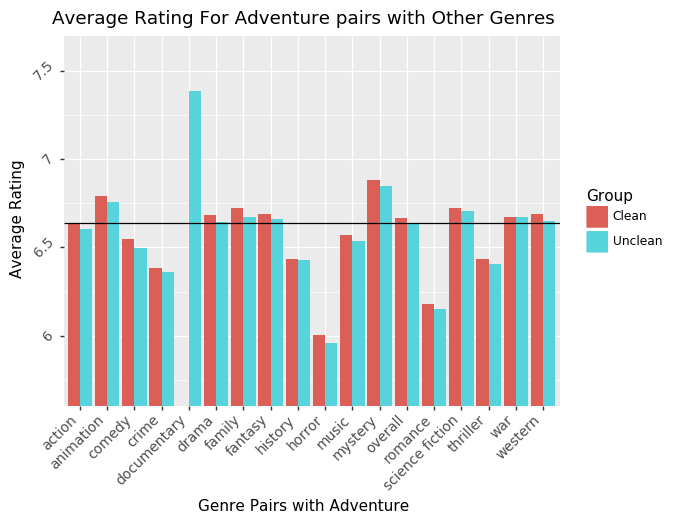

<ggplot: (-9223372036823047669)>

In [46]:
ggplot(concat_df, aes(x = 'genre_pairs', y = 'average_rating', fill = 'Group')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre Pairs with Adventure') + \
ylab('Average Rating') + \
ggtitle('Average Rating For Adventure pairs with Other Genres') + \
coord_cartesian(ylim=np.array([5.7,7.6])) + \
geom_hline(yintercept=6.64)

For our clean data set we see that animation, drama, family, fantasy, mystery, science fiction, war, and western when paired with adventure drive the overall adventure rating upward since those genres are higher than the overall.

We see under the unclean data set we see animation, documentary, drama, family, fantasy, mystery, science fiction, war, and western bring the adventure rating up which is very similar to the clean data. They differ slightly in magnitude but overall they are the same distributions. It's important to note that there were no adventure-documentaries in the clean data which caused that pair to have a 0 value.

To answer the original question, animation, documentary, drama, family, fantasy, mystery, science fiction, war, and western are the genres when paired with adventure drives the overall adventure average rating upward.

Going forward to the third question, we use the data from the clean data but see that most of the distributions are similar, so results and conclusions from the third question should still be fairly valid.


### Are higher rated pairs with the action-adventure genre correlated with higher popularity or higher profit?

Create a scatter plot since it is the best type of plot to check for correlation visually

Text(0.5,1,'Adventure Genre Pairs Average Rating versus Popularity')

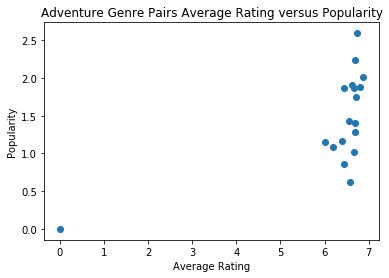

In [47]:
plt.scatter(clean['average_rating'], clean['popularity'])
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.title('Adventure Genre Pairs Average Rating versus Popularity')

Here we see some type of positive correlation between Average Rating and Popularity, but that is only because of the Documentary-Adventure pair with 0 observations in it. For our purposes, it is much better for us to remove this point. The distribution of the rest of the points are about the same as seen in the previous question. Also note that one of the points is also our overall point for adventure. We do not need that point for this analysis since it is comparing Adventure-Genre pairs specifically.

In [48]:
#Find the row indexes to remove
clean

,average_rating,genre_pairs,popularity,profit
0,6.664489,overall,1.867693,111116.350289
1,6.630316,action,1.904787,67925.464436
2,6.793655,animation,1.880993,18409.523381
3,6.549176,comedy,1.436190,24849.636310
4,6.385134,crime,1.166821,4639.884107
5,0.000000,documentary,0.000000,0.000000
6,6.684653,drama,1.279140,12429.374046
7,6.723904,family,1.743360,33828.848520
8,6.689617,fantasy,2.240361,42456.129696
9,6.436898,history,0.865137,248.911824


In [49]:
#Remove the documentary row
clean = clean.drop([0,5])

Now, we will create the same scatter plot with the documentary observation removed.

Text(0.5,1,'Adventure Genre Pairs Average Rating versus Popularity')

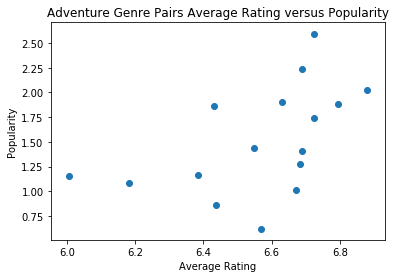

In [50]:
plt.scatter(clean['average_rating'], clean['popularity'])
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.title('Adventure Genre Pairs Average Rating versus Popularity')

Here, we see a clear positive correlation between Average Rating and Popularity. The relationship appears to be linear.

We will create the same scatter plot for Average Rating and Profit

Text(0.5,1,'Adventure Genre Pairs Average Rating versus Profit')

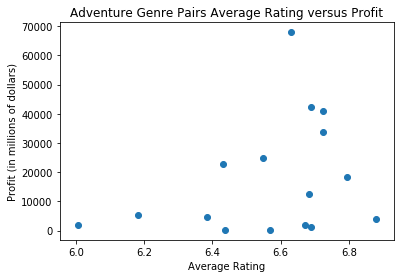

In [51]:
plt.scatter(clean['average_rating'], clean['profit'])
plt.xlabel('Average Rating')
plt.ylabel('Profit (in millions of dollars)')
plt.title('Adventure Genre Pairs Average Rating versus Profit')

We see a weak positive correlation here. The relationship does not appear to be linear.

We can verify with a correlation matrix for both of our scatter plots

In [52]:
clean.corr()

,average_rating,popularity,profit
average_rating,1.000000,0.502835,0.313879
popularity,0.502835,1.000000,0.708146
profit,0.313879,0.708146,1.000000


We see a moderate positive correlation between average_rating and popularity and a weak positive correlation between average_rating and profit. These values represent the pearson correlation coefficient, so it measures the strength of a linear relationship. It may be better to use the spearman's correlation coefficient for Average Rating versus Profit to find if there is a monotonic relationship between the two variables.

To answer the original question, there clearly is a moderate positive correlation between Average Rating and Popularity, so higher popularity is correlated with higher average rated adventure-genre pairs. There is a weak positive correlation between Average Rating and Profit, so higher profit is weakly correlated with higher average rated adventure-genre pairs.

### Are the classics rated higher on average compared to more modern movies?

Create separate data frames between the classics and non-classics so that we can find the average rating for all the movies for each group separately.

In [53]:
df_no = df_4[df_4['classic'] == 'no']
df_yes = df_4[df_4['classic'] == 'yes']

Compute average rating for non-classics

In [54]:
sum(df_no['vote_count'] * df_no['vote_average']) / sum(df_no['vote_count'])


6.566085054661758

This means that within the non-classics aka movies made in 1993 or later have an average rating of 6.566085054661758.

Compute average rating for classics

In [55]:
sum(df_yes['vote_count'] * df_yes['vote_average']) / sum(df_yes['vote_count'])

6.893072315948644

This means that within the classics aka movies made in 1992 or earlier have an average rating of 6.8930723159486442.

From this we see that the classics are rated higher on average compared to more modern movies since 6.8930723159486442 > 6.566085054661758.

### Are longer movies rated higher on average than shorter movies?

Create separate data frames between the long movies and shorter movies so that we can find the average rating for all the movies for each group separately.

In [56]:
df_short = df_5[df_5['movie_long'] == 'no']
df_long = df_5[df_5['movie_long'] == 'yes']

Compute average rating for short movies

In [57]:
sum(df_short['vote_count'] * df_short['vote_average']) / sum(df_short['vote_count'])

6.295919823866239

This means that within the short movies aka movies 110 minutes or shorter have an average rating of 6.2959198238662388.

Compute average rating for long movies

In [58]:
sum(df_long['vote_count'] * df_long['vote_average']) / sum(df_long['vote_count'])

6.882484795072453

This means that within the long movies aka movies longer than 110 minutes have an average rating of 6.882484795072453.

From this we see that the long movies are higher rated on average compared to shorter movies since 6.882484795072453 > 6.2959198238662388.

<a id='conclusions'></a>
## Conclusions

**Overall Limitations:** Since the data only includes up to movies up to the year 2015 and as early as 1960, the conclusions and inferences only apply to movies found in that range. The data set and genre tags were taken from TMDB, so the conclusions and inferences can also only be applied to movies found on that website. In addition, foreign movies most likely excluded from the data set or not entirely included and if they are present it was not taken account to during this analysis. So, conclusions and inferences can only be applied to movies in English.

**Question 1: Which genre contributes the most profit?**

**Answer:** From determining the profit of individual genres, we determine that Adventure is the genre that contributes most to profit because it has the highest profit out of all the genres.

**Possible application:** This could be useful to the movie industry to determine what kind of genre the next movie should be to maximize profits.

**Question specific limitations:** In this analysis the profit was only briefly looked at and there could be many other factors that may have impacted the results. For an example, a few movies could have generated a much larger profit compared to the other movies. This could mean that the median profit earned for that genre be a lower number compared to the average and be a lower profit when compared to another genre with a lower average but higher median. Also, about 7000 observations were lost in the dataset because of missing values in budget and revenue. The revenue values also may not be accurate and the information in the data set is not gauranteed to be up to date with reality. In a future investigation, it may be better to build a linear regression model around profit in order to find the best predictors for profit and then would know how to maximize profit in order to have better application to the entertainment industry.

**Question 2: Which genres drive the Adventure genre upward in average rating?**

**Answer:** By examining both the full dataset and reduced dataset average rating across the adventure-genre pairings, we find that animation, drama, family, fantasy, mystery, science fiction, war, and western are the genres when paired when adventure drives the average rating upward for both datasets. The Adventure-Documentary was highly impactful on the full data set but not on the reduced dataset because there were not any Adventure-Documentary movies in the reduced data set. Since the distribution of the other genre pairs are relatively the same, this is most likely just an issue with the lack of data since 7000 observations were lost. It is fairly safe to say that Adventure-Documentary movies also drive the Adventure genre upward in average rating.

**Possible application:** This could be useful to the movie industry to determine what kind of genres to mix with Adventure in order to obtain a high movie rating.

**Question 3: Are higher rated pairs correlated with higher popularity or higher profit?**

**Answer:** Higher popularity is moderately correlated with higher average rated adventure-genre pairs. Higher profit is weakly correlated with higher average rated adventure-genre pairs. This does not mean that higher rated movies cause movies to be more popular or vice versa despite a moderate strength relationship.

**Question specific limitations:** The documentary-adventure pair was removed for both comparisons since the reduced dataset did not have any documentary-adventure movies. Having more data in this category could change the conclusions slightly. The relationship between Average Rating and Profit may not be linear so the weak positive correlation found may not be valid. A spearman's correlation value may be better to use here which could change the interpretaion of the conclusion. To see a more cause-effect relationship it would be better to build a linear regression model around say popularity and see if average rating is a good predictor.

**Question 4: Are the classics rated higher on compared to more modern movies?**

**Answer:** The classics are higher rated on average compared to more modern movies.

**Possible application:** The movie industry could examine classic movies to determine properties that make the classics and more modern movies different to make a movie that includes more properties from the classics to achieve a higher movie rating.

**Question specific limitation:** The definition of a classic in this analysis is a movie 25 years or older. To compensate for some error, movies made in 1992 or earlier are classics. However, the highest year released point was 2015 so 25 years would actually make it 1989 to be safe. Since I based it around the current year of 2018 but the dataset is limited to 2015 and before, these conclusions may not be valid. There also may be bias because more recent movies have "hype" and social media whereas back then people didn't have ways to see what movie is popular around the time. So the number of people that bothers to watch and rate old movies may not be as many as those who watch more recent movies which in turn makes modern movies more lower because it attracts every audience. For older movies, perhaps only hobbyists who want to watch old movies may be watching and rating them, inflating the ratings since a hobbyist is more likely to rate a movie high that an overall audience may rate lower. In essence, it could be that the population of people rating the movies could be different in the two groups which makes the results invalid. Given the dataset and information, there is no way to know who is the population in this case.

**Question 5: Are longer movies rated higher on average than shorter movies?**

**Answer:** Longer movies are higher rated than short movies.

**Possible application:** The movie industry could note this and make longer movies rather than shorter ones if they are aiming to achieve a high movie rating.

**Question specific limitations:** The definition of what a long movie is and a short movie was made arbitrarily. This definition was based on movies longer than 110 were considered long and short otherwise. This does not mean that the longer a movie is, the higher rated it becomes and vice versa. It happens to be that movies longer than 110 minutes on average are rated higher than movies shorter than that. In a future study, it would be good to examine the point at which a movie is at the peak average rating since there is most likely a point at which a movie length reaches maximizes the average rating and adding to the length even more reduces the average rating. A regression model may also be helpful in determining if movie length is a good preidctor of average rating.